# Proyek Analisis Data: Bike Sharing
- **Nama:** Shofura Tsabitah Rahmah
- **Email:** shofuratsabitah@gmail.com
- **ID Dicoding:** shofura

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penyewaan sepeda tiap bulannya pada tahun 2011 dan 2012?
2. Bagaimana perbandingan sewa sepeda pengguna casual vs registered pada tiap harinya?
3. Bagaimana tren penyewaan sepeda berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import library untuk visualisasi data dan manipulasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modul datetime dari library datetime
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset CSV menggunakan library pandas
df_hour = pd.read_csv('hour.csv')

# Mencari jumlah baris dan kolom dataset
print(f"Dataset berisi {df_hour.shape[0]} baris dan {df_hour.shape[1]} kolom")

# Menampilkan 5 baris pertama data
df_hour.head()

Dataset berisi 17379 baris dan 17 kolom


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Menampilkan informasi ringkas dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Dataset berisi 17379 baris dan 17 kolom. Berikut penjelasan setiap kolomnya
* `instant` : Nomor urut baris
* `dteday` : Tanggal
* `season` : Musim (1 : Semi, 2 : Panas, 3 : Gugur, 4 : Dingin)
* `yr` : Tahun (0 : 2011, 1 : 2012)
* `mnth` : Bulan (1-12)
* `hr` : Jam (0-23)
* `holiday` : Hari tersebut libur/tidak (1 : Libur, 0 : Bukan libur)
* `weekday` : Hari dalam minggu (0 : Minggu, 1 : Senin, 2 : Selasa, 3 : Rabu, 4 : Kamis, 5 : Jumat, 6 : Sabtu)
* `workingday` : Hari tersebut hari kerja/tidak (1 : Hari kerja, 0 : Bukan hari kerja)
* `weathersit` : Kondisi cuaca (1 : Cerah, 2 : Berkabut, 3 : Hujan ringan, 4 : Hujan lebat)
* `temp` : Suhu aktual (normalized, skala 0 hingga 1)
* `atemp` : Suhu yang dirasakan (normalized, skala 0 hingga 1)
* `hum` : Kelembapan (normalized, skala 0 hingga 1)
* `windspeed` : Kecepatan angin (normalized, skala 0 hingga 1)
* `casual` : Jumlah pengguna casual
* `registered` : Jumlah pengguna terdaftar
* `cnt` : Jumlah total penyewaan sepeda baik pengguna casual maupun register

### Assessing Data

In [ ]:
# Cek duplikasi data
print(f"Jumlah duplikat pada data : {df_hour.duplicated().sum()}")

Jumlah duplikat pada data : 0


In [ ]:
# Cek missing value data
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


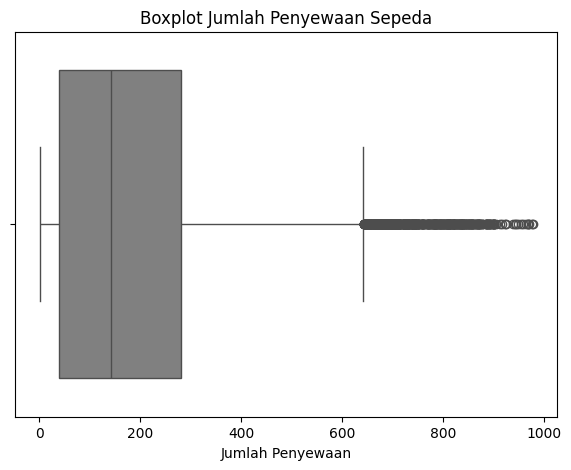

In [ ]:
# Cek outlier data melalui visualisasi Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x=df_hour['cnt'], color='grey')
plt.title('Boxplot Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.show()

In [ ]:
# Cek invalid data melalui min max

df_hour.describe().loc[['min','max']]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.02,0.0,0.0,0.0000,0.0,0.0,1.0
max,17379.0,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.00,1.0,1.0,0.8507,367.0,886.0,977.0


**Insight:**
- Tidak ada duplikasi pada dataset
- Tidak ada missing value pada dataset
- Tidak ada data yang memiliki nilai tidak wajar seperti negatif
- Melalui visualisasi boxplot, terdapat outlier pada data
- Terdapat tipe data yang kurang sesuai yaitu `dteday` menggunakan string

### Cleaning Data

In [ ]:
# Inisialisasi kolom is_outlier
df_hour['is_outlier'] = False

# Identifikasi outlier melalui IQR method
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_hour[(df_hour['cnt'] < lower_bound) | (df_hour['cnt'] > upper_bound)]

# Menyimpan informasi apakah baris tersebut outlier/tidak
df_hour.loc[outliers.index, 'is_outlier'] = True

# Menampilkan data outliers
print(f"Outliers yang ditemukan: {len(outliers)} baris")
print(outliers['cnt'])

Outliers yang ditemukan: 505 baris
5536     651
10358    644
10359    712
10382    676
10383    734
        ... 
16885    724
16909    688
16933    679
17053    662
17077    678
Name: cnt, Length: 505, dtype: int64


In [ ]:
# Membuat dataset tanpa outliers
df_cleaned = df_hour[df_hour['is_outlier'] == False]
print(df_cleaned.shape)

(16874, 18)


In [ ]:
# Mengubah tipe data kolom 'dteday' dari string menjadi datetime
df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

<ipython-input-9-6a8996ee0947>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])


**Insight:**
- Terdapat 505 baris outliers
- Dataset yang sudah di-cleaning berkurang menjadi 16874 baris
- Mengubah tipe data kolom `dteday` dari string menjadi datetime. Hal ini dilakukan untuk mempermudah apabila ingin dilakukan analisis melibatkan time series

## Exploratory Data Analysis (EDA)

### Total dan Rata-rata Penyewaan Sepeda Tiap Musim

In [ ]:
df_cleaned.groupby('season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt': ['mean', 'sum']
})

casual registered         cnt        
           sum        sum        mean     sum
season                                       
1        57426     400392  108.410609  457818
2       185714     620057  189.459440  805771
3       205829     703317  211.527687  909146
4       114937     626639  180.872195  741576

### Total dan Rata-rata Penyewaan Sepeda Tiap Tahun ####

In [ ]:
df_cleaned.groupby('yr').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt':['sum','mean']
})

casual registered      cnt            
       sum        sum      sum        mean
yr                                        
0   247103     995349  1242452  143.735770
1   316803    1355056  1671859  203.142041

### Total dan Rata-rata Penyewaan Sepeda Tiap Bulan ###

In [ ]:
df_cleaned.groupby('mnth').agg({
    'cnt': ['sum','mean']
})

cnt            
         sum        mean
mnth                    
1     134933   94.424773
2     151352  112.865026
3     203142  141.365344
4     238137  170.952620
5     297717  206.461165
6     301669  218.759246
7     304686  212.324739
8     297281  211.587900
9     274187  204.008185
10    268756  194.328272
11    240590  169.908192
12    201861  137.320408

### Rata-rata Penyewaan Sepeda Berdasarkan Weekday ###

In [ ]:
df_cleaned.groupby('weekday').agg({
    'cnt': ['sum', 'mean']
})

cnt            
            sum        mean
weekday                    
0        424861  171.730396
1        401536  166.750831
2        403054  170.280524
3        398835  167.648172
4        412505  173.613215
5        437716  180.949153
6        435804  177.806610

### Total dan Rata-rata Penyewaan Sepeda Tiap Jam ###

In [ ]:
df_cleaned.groupby('hr').agg({
    'cnt': ['sum','mean']
})

cnt            
       sum        mean
hr                    
0    39130   53.898072
1    24164   33.375691
2    16352   22.869930
3     8174   11.727403
4     4428    6.352941
5    14261   19.889819
6    55132   76.044138
7   154171  212.064649
8   170715  284.525000
9   159438  219.309491
10  126257  173.668501
11  150010  206.910345
12  172651  242.828411
13  169129  239.559490
14  165396  231.647059
15  174172  243.256983
16  219529  305.750696
17  214962  372.551127
18  209297  349.410684
19  217395  304.474790
20  164550  226.030220
21  125445  172.314560
22   95612  131.335165
23   63941   87.831044

### Penyewaan Sepeda Pada Working Day ###

In [ ]:
df_cleaned.groupby('workingday').agg({
    'cnt': ['sum','mean']
})

cnt            
                sum        mean
workingday                     
0            937712  172.913885
1           1976599  172.613658

### Penyewaan Sepeda Pada Hari Libur ###

In [ ]:
df_cleaned.groupby('holiday').agg({
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean'],
    'cnt': ['sum','mean']
})

casual            registered                  cnt            
            sum       mean        sum        mean      sum        mean
holiday                                                               
0        541745  33.081644    2295519  140.175806  2837264  173.257450
1         22161  44.500000      54886  110.212851    77047  154.712851

### Penyewaan Sepeda Berdasarkan Kondisi Cuaca ###

In [ ]:
df_cleaned.groupby('weathersit').agg({
    'cnt': ['mean', 'sum']
})

cnt         
                  mean      sum
weathersit                     
1           185.314247  2042163
2           162.626463   722712
3           106.050462   149213
4            74.333333      223

**Insight:**
- **Musim gugur** menjadi musim **paling favorit** penyewa sepeda dengan total dan rata-rata tertinggi dibanding musim-musim lainnya
- **Tahun 2012** mengalami **kenaikan jumlah penyewa** dibanding tahun 2011
- **Bulan Juni, Juli, dan Agustus** menjadi top 3 bulan dengan rata-rata penyewa **paling banyak**
- **Hari Jumat** menjadi hari dengan rata-rata dan jumlah penyewa **paling banyak**
- **Jam 4-6 sore** menjadi top jam-jam **paling ramai** pengguna menyewa sepeda
- Sepeda **lebih ramai disewa pada hari kerja** dibanding hari libur
- **Cuaca favorit** untuk pengguna menyewa sepeda adalah **cuaca cerah**.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda tiap bulannya pada tahun 2011 dan 2012?

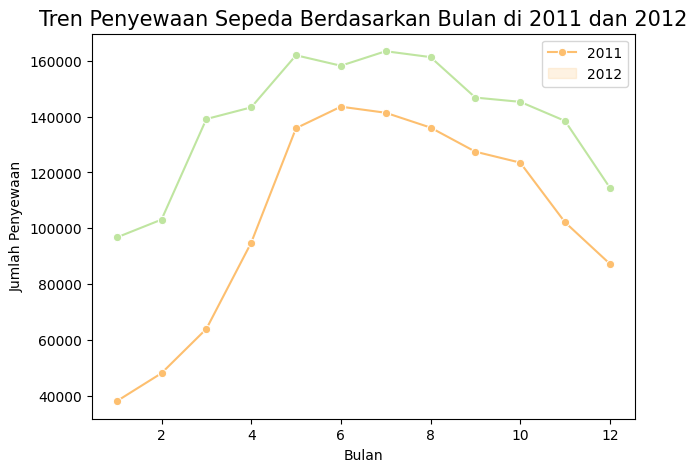

In [ ]:
monthly_rent = df_cleaned.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(
    x='mnth',
    y='cnt',
    hue='yr',
    data=monthly_rent,
    marker="o",
    palette="Spectral")

plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di 2011 dan 2012', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(['2011', '2012'])
plt.show()

Penyewaan sepeda di tahun 2012 mengalami kenaikan dari tahun sebelumnya. Meskipun begitu terdapat kesamaan pola dari keduanya, yaitu banyaknya penyewaan terjadi di bulan Mei-Agustus dan penyewaan melemah di bulan Desember-Januari. Kemungkinan penyebabnya adalah pengaruh musim dan cuaca, dimana terjadi cuaca yg ekstrim pada bulan Desember-Januari.

### Pertanyaan 2: Bagaimana perbandingan sewa sepeda pengguna casual vs registered pada tiap harinya?

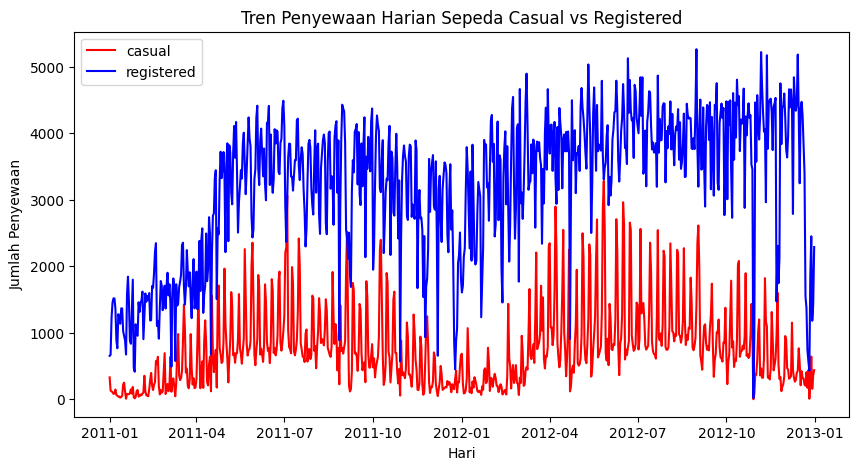

In [ ]:
daily_rent = df_cleaned.groupby('dteday')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    x='dteday',
    y='casual',
    label='casual',
    color='red',
    data=daily_rent)

sns.lineplot(
    x='dteday',
    y='registered',
    label='registered',
    color='blue',
    data=daily_rent)

plt.title('Tren Penyewaan Harian Sepeda Casual vs Registered')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

Pengguna registered selalu konsisten lebih banyak daripada pengguna casual. Mirip dengan temuan di Pertanyaan 1, baik pengguna casual maupun registered mempunyai kesamaan pola penyewaan di waktu-waktu tertentu yang dipengaruhi oleh musim dan cuaca.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan jam?

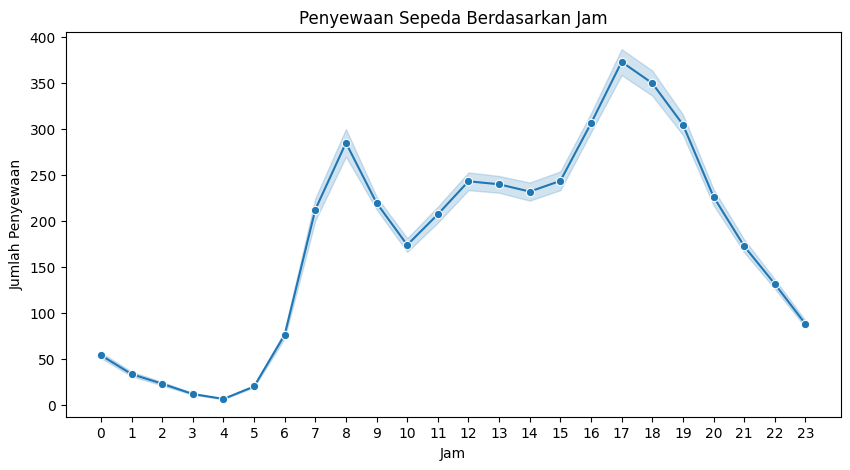

In [ ]:
hour_rent = df_cleaned.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    x='hr',
    y='cnt',
    data=df_cleaned,
    marker='o')

plt.xticks(range(0,24))
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Melalui visualisasi data di atas, kita dapat melihat adanya beberapa titik lonjakan pengguna di jam-jam tertentu yaitu jam 8 pagi dan jam 5 sore. Kemungkinan penyebabnya adalah karena banyak pengguna yang menyewa sepeda untuk berangkat dan pulang kantor atau sekolah.

## Analisis Lanjutan : Windspeed Clustering

<ipython-input-63-53293dbef804>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['wind_cluster'] = df_cleaned['windspeed'].apply(wind_cluster)
<ipython-input-63-53293dbef804>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


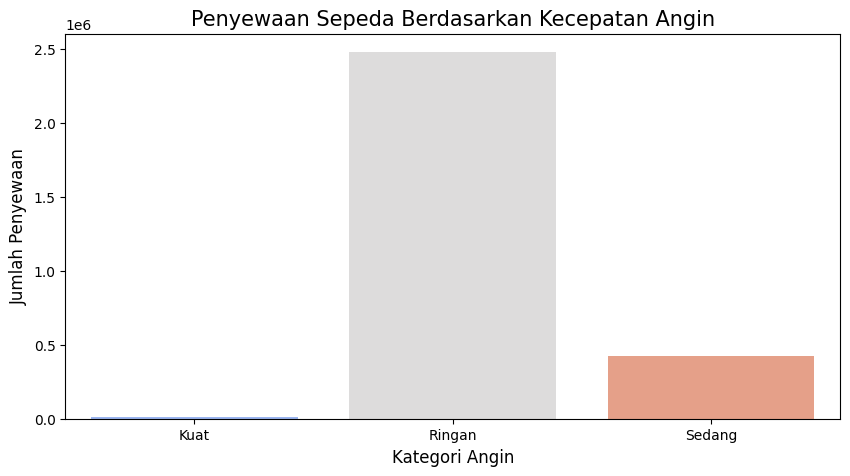

In [ ]:
#clustering windspeed
def wind_cluster(windspeed):
  if windspeed < 0.3:
    return 'Ringan'
  elif windspeed < 0.6:
    return 'Sedang'
  else:
    return 'Kuat'

df_cleaned['wind_cluster'] = df_cleaned['windspeed'].apply(wind_cluster)

wind_rent = df_cleaned.groupby('wind_cluster')['cnt'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    x='wind_cluster',
    y='cnt',
    data=wind_rent,
    palette='coolwarm')

plt.title('Penyewaan Sepeda Berdasarkan Kecepatan Angin', fontsize=15)
plt.xlabel('Kategori Angin', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()

Dengan menggunakan teknik clustering, dapat lebih mudah untuk melihat pengguna menyewa pada kondisi angin tertentu. Dari visualisasi di atas dapat disimpulkan bahwa jarang sekali pengguna menyewa sepeda di kondisi angin yang kuat. Mayoritas pengguna memilih untuk menyewa sepeda pada kondisi angin yang ringan.

## Conclusion

**1. Bagaimana tren penyewaan sepeda tiap bulannya pada tahun 2011 dan 2012?**

- Penyewaan sepeda di tahun 2012 mengalami kenaikan dari tahun sebelumnya
- Terdapat kesamaan pola dari keduanya karena adanya pengaruh musim dan cuaca

**2. Bagaimana perbandingan sewa sepeda pengguna casual vs registered pada tiap harinya?**

- Pengguna registered selalu konsisten lebih banyak daripada pengguna casual
- Terdapat kesamaan pola dari keduanya karena adanya pengaruh musim dan cuaca

**3. Bagaimana tren penyewaan sepeda berdasarkan jam?**

- Titik lonjakan pengguna di jam 8 pagi dan jam 5 sore karena banyak pengguna yang menyewa sepeda untuk berangkat dan pulang kantor atau sekolah

**4. Windspeed Clustering : Penyewaan Sepeda Berdasarkan Kecepatan Angin**
- Jarang sekali pengguna menyewa sepeda di kondisi angin yang kuat
- Mayoritas pengguna memilih untuk menyewa sepeda pada kondisi angin yang ringan.

## Recommendation ##

1. Penawaran paket pelanggan atau reward loyalitas khusus pengguna karyawan/siswa/mahasiswa
2. Integrasi ataupun bekerja sama dengan beberapa wilayah perkantoran dan wilayah sekolah/kampus
3. Integrasi ataupun bekerja sama dengan transportasi publik
4. Optimalisasi ketersediaan sepeda sewa di jam-jam sibuk


In [ ]:
df_cleaned.to_csv("df_cleaned.csv", index=False)